# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2022/2023
## Assignment #2 - Empirical Studies & EDA

***
### Group: E
### Names of members: Parvin Abbasi, Aron Jinga, Atharva Phatak

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://www.python.org), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=2637), especially L02 & L03.

**Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.** 

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and every task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, November 8, 2022, 20:00 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, November 16, 2022, 10:00 - 13:00 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A02_Group_A.ipynb
2. RM_A02_Group_A.pdf

***
***

In [1]:
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'Datasets/CRU_data.csv')
sbs.set_theme()
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

#### Task 1 **[10 points] Data Scales**

1. For each of the features in the CRU dataset (e.g., precipitation), identify all scales of data whose definition is valid for all entries in the columns that belong to that feature. Create a table using python code that contains all features as rows, data scales as columns, and binary table entries indicating whether the feature values (i.e., column entries in the database) correspond to the data scale or not.
2. For each of the features, briefly explain to which of the errors mentioned in the lecture this feature is prone. 

In [3]:
#Solution 1
#task1.1:
df_scale = pd.DataFrame({'Feature':  ['Country', 'Year', 'Tempreture', 'Wet days', 'Precipitation' ],
        'Categorical': ['1', '0', '0', '0', '0'],
        'Interval': ['0', '1', '1', '0', '0'],
        'Ratio': ['0', '0', '0', '1', '1'],
        'Ordinal': ['0', '0', '0', '0', '0']})
df_scale = df_scale.set_index('Feature')
df_scale

,Categorical,Interval,Ratio,Ordinal
Feature,,,,
Country,1,0,0,0
Year,0,1,0,0
Tempreture,0,1,0,0
Wet days,0,0,1,0
Precipitation,0,0,1,0


#### task 1.2 :
 Measurement error can happen for temperature and wet days and precipitation because broken equipment can record wrong values. 
Sampling error can happen for temperature and wet days and precipitation because gathering data from different cities will obtain different results. 
For example, in 2020, only Berlin and Hamburg and Stuttgart are recorded but in 1996, other three cities. 
For country and year no error is prone.

#### Task 2 **[10 points] Types of Experiments**

Different types of studies and experiments were discussed in the lecture. With respect to climate data, state whether it is possible to conduct the following experiments given below. Briefly explain your reasoning and give an example for each of the four types.

1. Exploratory study
2. Assessment study
3. Observation experiments
4. Manipulation experiments


1. Exploratory study: 
    By looking at data we can see that the temperature  is increasing in the long term and the weather pattern is visible. 
    Also some countries are colder than the others depending on their location. 
    Countries that are located around the equator experience hot weather throughout the year. 
    It is because the sun remains almost directly overhead everyday.
    Countries that are further North or South of the equator experience a change in seasons, when hot weather follows cold weather.

2. Assessment study: In assessment study we can test data's limit. The minimum recorded value for temperature is -89.2°C (-128.6°F) but in the dataset we can see -999 which is wrong. 

3. Observation experiments: 

4. Manipulation experiments: We cannot change the temperature and precipitation and so on to manipulate data 


#### Task 3 **[40 points] Visualization**

Plot the four statistics given below using suitable python packages:

1. Timeline of cumulative precipitation over the course of the year 2020. _(i)_ world-wide and _(ii)_ per country.
2. Average precipitation per wetday per country in 2020.
3. Climate diagram based on the average data from the last decade (2011 - 2020) for one country of your choice.<br> _Note: Include the amount of precipitation as well as min, mean, and max temperature._
4. Frequency distribution of mean temperatures in Germany in the timespans (i) 1960-1980 and (ii) 2000-2020. <br> _Note: Use appropriate, common bins for both diagrams._

As a reminder, the following instructions will apply to **all visualization tasks** as part of the RM course: Make sure to use appropriate plot types for visualization (e.g., histogram, bar plot, scatter plot, line plot, ...) and proper axis labeling/scaling. Add a legend to each plot to facilitate the viewer's understanding. Make sure to describe/interpret the outcome of your visualization.

_Hint: It might be helpful to use the [wide__to__long](https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html) function in pandas to format the data for plotting!_ <br>

In [4]:
#db = df[df['YEAR'] == 2020].iloc[:,66:78]
#sbs.relplot(
#data = db,
#x = db.T,
#y = range(0, db.max).float(),
#kind = "line")
#index = pd.Index(["GERMANY", "INDIA","TURKEY", "PAKISTAN", "IRAN", "ALBANIA", "EGYPT", "BELARUS", "ROMANIA", "CHINA", "NEPAL", "MEXICO"])
#dpI = db.set_index([index, 'PRECIP_JAN'])
#dpI.T

In [5]:
###########################################
#Soluition 1 start
df_indexed = df[df['YEAR'] == 2020].set_index("COUNTRY")
df_a = df_indexed.iloc[:,65:77]
df_b = np.cumsum(df_a.T)
df_a

,PRECIP_JAN,PRECIP_FEB,PRECIP_MAR,PRECIP_APR,PRECIP_MAY,PRECIP_JUN,PRECIP_JUL,PRECIP_AUG,PRECIP_SEP,PRECIP_OCT,PRECIP_NOV,PRECIP_DEC
COUNTRY,,,,,,,,,,,,
GERMANY,36.5,97.1,43.3,17.6,36.4,82.9,52.8,77.0,52.5,69.4,17.6,48.7
INDIA,20.0,10.5,23.2,43.8,58.4,160.2,244.0,289.6,196.9,88.0,30.9,13.6
TURKEY,62.9,75.1,69.2,52.5,72.8,49.3,16.1,12.5,12.1,25.5,39.2,48.8
PAKISTAN,50.2,15.4,64.8,28.9,20.5,14.6,37.2,102.7,33.0,2.3,14.5,15.3
IRAN,36.2,28.8,43.4,55.6,14.3,1.7,2.7,3.3,0.7,3.5,28.9,26.6
ALBANIA,20.7,48.4,95.8,94.3,51.5,101.0,20.1,86.1,88.3,102.0,25.5,223.9
EGYPT,9.0,10.0,5.6,2.0,1.7,1.9,2.7,2.6,1.3,1.9,6.4,2.8
BELARUS,33.7,43.3,29.6,13.5,78.8,96.9,72.9,63.8,38.5,55.0,37.8,35.7
ROMANIA,11.1,45.9,35.6,15.2,79.8,119.1,78.1,38.1,53.5,67.3,22.0,54.5


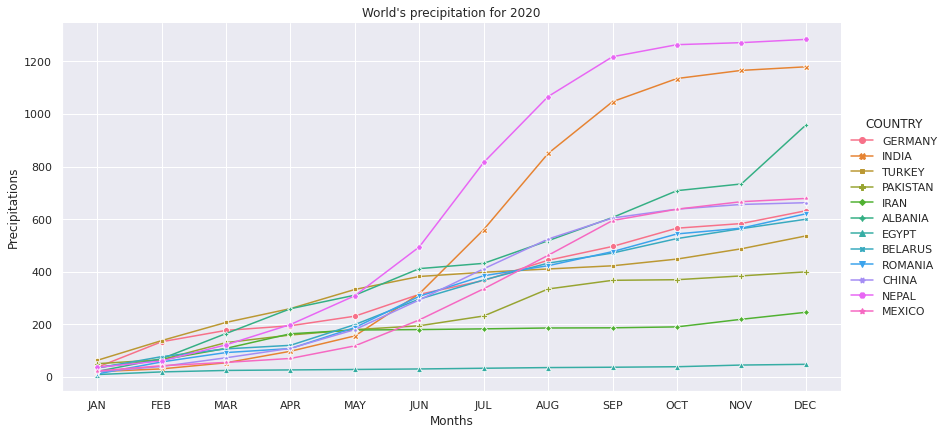

In [6]:
#Plotting of the graph for task 1
g = sbs.relplot(data=df_b, kind='line', height = 6, aspect = 2, markers = True, dashes = False )
g.set_xticklabels(months) #setting the x ticks to make them easier to read
g.set_xlabels("Months")
g.set_ylabels("Precipitations")
g.set(title = "World's precipitation for 2020")

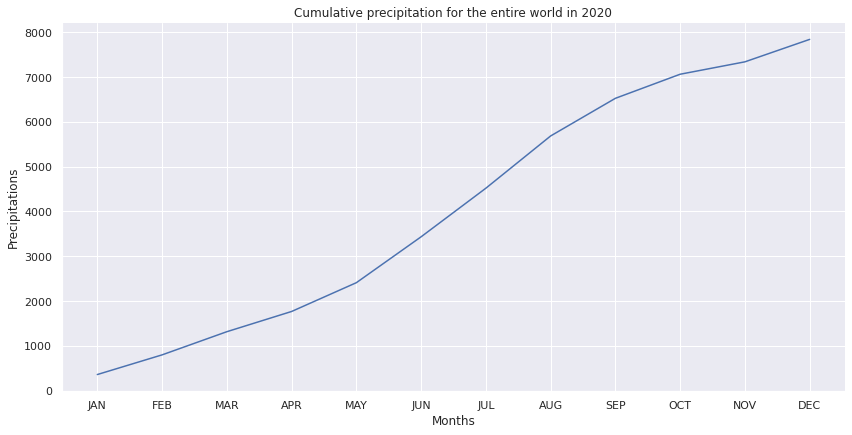

In [20]:
ctr_precip = sbs.relplot(data = np.cumsum(df_a.sum()),kind='line', height = 6, aspect = 2, markers = True, dashes = False )
ctr_precip.set_xticklabels(months) #setting the x ticks to make them easier to read
ctr_precip.set_xlabels("Months")
ctr_precip.set_ylabels("Precipitations")
ctr_precip.set(title = "Cumulative precipitation for the entire world in 2020")

#######################
# Solution 1 end 
######################

In [8]:
#### Task 2 ####
df_indexed = df[df['YEAR'] == 2020].set_index("COUNTRY")
df_precip = df_indexed.iloc[:,65:77]
df_wet = df_indexed.iloc[:,49:61]
df_wet["Total Precipitation"] = df_precip.sum(axis=1)
df_wet

,WET_DAYS_JAN,WET_DAYS_FEB,WET_DAYS_MAR,WET_DAYS_APR,WET_DAYS_MAY,WET_DAYS_JUN,WET_DAYS_JUL,WET_DAYS_AUG,WET_DAYS_SEP,WET_DAYS_OCT,WET_DAYS_NOV,WET_DAYS_DEC,Total Precipitation
COUNTRY,,,,,,,,,,,,,
GERMANY,12.9,22.2,14.4,4.9,10.0,14.7,12.8,13.5,10.9,21.2,7.4,15.7,631.8
INDIA,1.7,1.0,2.2,3.3,4.0,8.6,11.5,12.4,8.3,4.0,2.1,1.2,1179.1
TURKEY,9.7,13.5,13.2,11.5,12.1,8.3,3.5,5.4,2.6,5.4,6.4,9.2,536.0
PAKISTAN,4.2,1.7,7.0,6.4,6.0,4.9,5.5,6.4,3.5,0.4,2.5,2.2,399.4
IRAN,7.1,6.6,9.1,9.6,4.5,0.5,0.7,0.7,0.3,1.3,5.8,6.0,245.7
ALBANIA,5.2,8.6,13.1,13.2,10.7,9.9,4.8,8.6,10.3,9.1,6.1,16.8,957.6
EGYPT,1.4,2.3,1.0,0.4,0.5,0.2,0.1,0.1,0.0,0.5,1.1,0.8,47.9
BELARUS,14.1,17.5,11.5,5.0,15.0,15.1,13.8,11.5,8.6,13.2,15.5,13.4,599.5
ROMANIA,5.3,12.3,10.0,4.1,16.5,17.1,11.7,5.6,7.0,11.7,7.0,13.4,620.2


In [9]:
for i in df_wet.columns:
    df_wet[i] = df_wet['Total Precipitation']/df_wet[i]
df_wet

,WET_DAYS_JAN,WET_DAYS_FEB,WET_DAYS_MAR,WET_DAYS_APR,WET_DAYS_MAY,WET_DAYS_JUN,WET_DAYS_JUL,WET_DAYS_AUG,WET_DAYS_SEP,WET_DAYS_OCT,WET_DAYS_NOV,WET_DAYS_DEC,Total Precipitation
COUNTRY,,,,,,,,,,,,,
GERMANY,48.976744,28.459459,43.875000,128.938776,63.180000,42.979592,49.359375,46.800000,57.963303,29.801887,85.378378,40.242038,1.0
INDIA,693.588235,1179.100000,535.954545,357.303030,294.775000,137.104651,102.530435,95.088710,142.060241,294.775000,561.476190,982.583333,1.0
TURKEY,55.257732,39.703704,40.606061,46.608696,44.297521,64.578313,153.142857,99.259259,206.153846,99.259259,83.750000,58.260870,1.0
PAKISTAN,95.095238,234.941176,57.057143,62.406250,66.566667,81.510204,72.618182,62.406250,114.114286,998.500000,159.760000,181.545455,1.0
IRAN,34.605634,37.227273,27.000000,25.593750,54.600000,491.400000,351.000000,351.000000,819.000000,189.000000,42.362069,40.950000,1.0
ALBANIA,184.153846,111.348837,73.099237,72.545455,89.495327,96.727273,199.500000,111.348837,92.970874,105.230769,156.983607,57.000000,1.0
EGYPT,34.214286,20.826087,47.900000,119.750000,95.800000,239.500000,479.000000,479.000000,inf,95.800000,43.545455,59.875000,1.0
BELARUS,42.517730,34.257143,52.130435,119.900000,39.966667,39.701987,43.442029,52.130435,69.709302,45.416667,38.677419,44.738806,1.0
ROMANIA,117.018868,50.422764,62.020000,151.268293,37.587879,36.269006,53.008547,110.750000,88.600000,53.008547,88.600000,46.283582,1.0


We can observe in the table for the wet_days in september, Egypt has an infinity point, having no wet days in the month of September. As such, the plot will not have any data for Egypt in September and it will connect the August and October directly

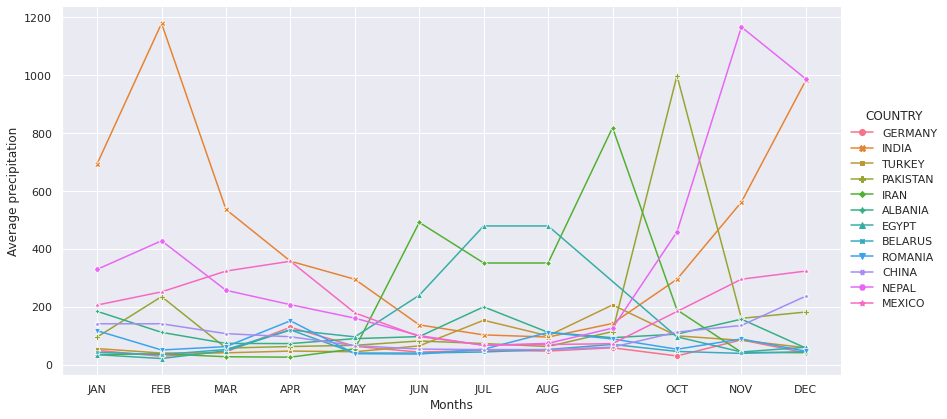

In [24]:
wet_day = sbs.relplot(data = df_wet.drop("Total Precipitation",axis=1).T, kind = 'line', height = 6, aspect = 2, markers = True, dashes = False)
wet_day.set_xticklabels(months)
wet_day.set_xlabels("Months")
wet_day.set_ylabels("Average precipitation")
#Solution 2 end

In [11]:
### Task 3 ###
db = df[(df['COUNTRY'] == 'INDIA') & (df['YEAR'].between(2011,2020))].set_index("COUNTRY")
# Created dataset for india between 2011 and 2020

<AxesSubplot:ylabel='Precipitation'>

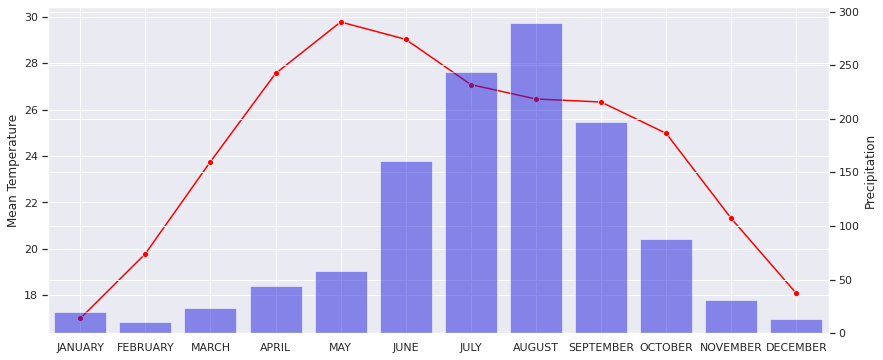

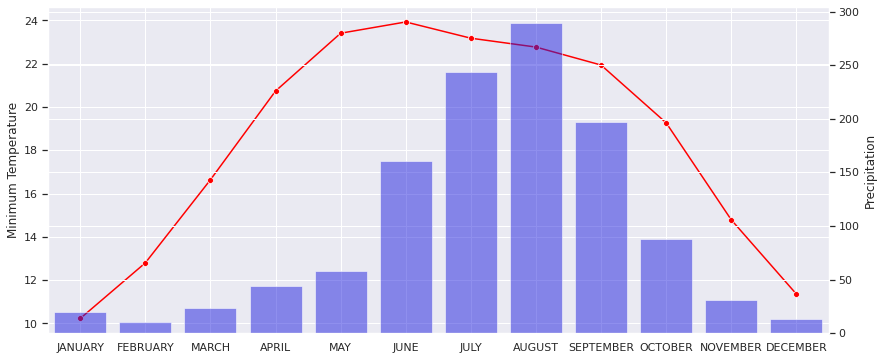

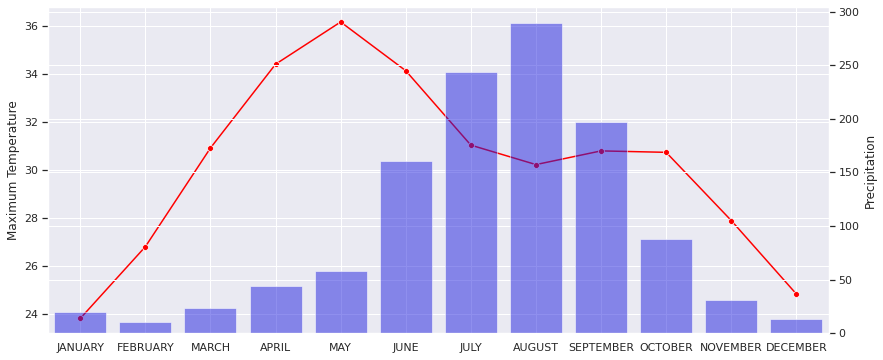

In [12]:
#Climate graphs
df_india = df[df['COUNTRY'] == 'INDIA'].query("YEAR >2010").set_index("YEAR").drop("COUNTRY",axis=1)
df_india_mean_temp = df_india.iloc[:,:12]
df_india_precip_pc = df_precip.iloc[1:2].rename(columns = {'PRECIP_JAN':'JANUARY', 'PRECIP_FEB':'FEBRUARY', 'PRECIP_MAR' : 'MARCH',
                                                           'PRECIP_APR':'APRIL','PRECIP_MAY':'MAY','PRECIP_JUN':'JUNE','PRECIP_JUL':'JULY',
                                                           'PRECIP_AUG':'AUGUST','PRECIP_SEP':'SEPTEMBER','PRECIP_OCT':'OCTOBER','PRECIP_NOV':'NOVEMBER',
                                                           'PRECIP_DEC':'DECEMBER'})

#ax1 = sbs.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(14,6))
sbs.lineplot(data=df_india_mean_temp.sum(axis=0)/10,color='red',marker = 'o',sort=False,ax=ax1)
ax1.set(ylabel="Mean Temperature")
ax2 = ax1.twinx()
ax2.set(ylabel = "Precipitation")
sbs.barplot(data=df_india_precip_pc,ax=ax2,alpha=0.5,color='blue')


df_india_min_temp = df_india.iloc[:,16:28]
fig, ax1 = plt.subplots(figsize=(14,6))
sbs.lineplot(data=df_india_min_temp.sum(axis=0)/10,color='red',marker = 'o',sort=False,ax=ax1)
ax1.set(ylabel="Minimum Temperature")
ax2 = ax1.twinx()
ax2.set(ylabel = "Precipitation")
sbs.barplot(data=df_india_precip_pc,ax=ax2,alpha=0.5,color='blue')

df_india_max_temp = df_india.iloc[:,32:44]
fig, ax1 = plt.subplots(figsize=(14,6))
sbs.lineplot(data=df_india_max_temp.sum(axis=0)/10,color='red',marker = 'o',sort=False,ax=ax1)
ax1.set(ylabel="Maximum Temperature")
ax2 = ax1.twinx()
ax2.set(ylabel = "Precipitation")
sbs.barplot(data=df_india_precip_pc,ax=ax2,alpha=0.5,color='blue')

#### Task 4 **[40 points] EDA**

Following the Titanic example from the lecture, we want to gain first insights into multivariate EDA. We want to see if the climate warming is different between countries. For this purpose, take the following steps using python to answer the question **whether the number of warmer/colder months (compared to 50 years ago) changes between countries and whether there is a difference between decades.**

For this task use the data from Egypt and Belarus starting from the year 1961.

1. For each month, calculate if it was warmer or colder compared to the same month 50 years ago.
2. Create two contingency tables of **total number of warmer and colder months per country** (one containing the absolute counts and the second one containing row and column proportions).
3. Create another two contingency tables of **total number of warmer and colder months per decade** (one containing the absolute counts and the second one containing row and column proportions).
4. Plot a histogram or bar chart that shows the **total number of warmer months by country and decade**. _Hint: The usage of different colors might help a lot!_
5. Now combine the contingency tables of task 4.2 and 4.3 (see Titanic example discussed in the EDA lecture), so that you have a subdivision into countries by decade, with absolute counts and row/column proportions.
6. Calculate the expected frequencies $f_e$ for each conjunct event in the contingency table from task 4.5 and create a copy of the table from task 4.5 containing the $f_e$ values.
7. Calculate $\chi²_{Egypt}$ and $\chi²_{Belarus}$ and interpret.
8. What does a small $\chi²$ value mean? What if it's zero? Explain.

In [13]:
df_egypt = df[df["COUNTRY"] == "EGYPT"].iloc[:,:14].drop("COUNTRY",axis=1).query("YEAR > 1960").reset_index().drop("index",axis=1)

In [14]:
df_egypt.head()

,YEAR,TMP_MEAN_JAN,TMP_MEAN_FEB,TMP_MEAN_MAR,TMP_MEAN_APR,TMP_MEAN_MAY,TMP_MEAN_JUN,TMP_MEAN_JUL,TMP_MEAN_AUG,TMP_MEAN_SEP,TMP_MEAN_OCT,TMP_MEAN_NOV,TMP_MEAN_DEC
0,1961,13.8,13.0,15.9,22.2,26.0,30.4,28.7,28.9,25.4,23.0,18.3,14.2
1,1962,13.8,13.9,20.2,21.8,25.8,29.4,29.3,30.2,27.7,25.1,22.0,14.6
2,1963,14.9,16.3,17.1,23.0,25.9,29.2,29.6,29.9,28.1,25.8,19.2,14.9
3,1964,11.6,13.6,18.4,22.0,24.5,28.3,28.4,28.7,25.8,24.0,18.5,14.7
4,1965,13.3,15.0,18.6,21.2,24.8,29.2,29.4,29.3,27.3,23.1,18.1,14.2


In [18]:
is_warmer = []
#if(df_egypt.loc[0,"TMP_MEAN_JAN"] < df_egypt.loc[50,"TMP_MEAN_JAN"]):
for j in df_egypt.columns[1:]:
    is_warmer_per_month = []
    for i in range(0,10):
        is_warmer_per_month.append(int(df_egypt.loc[i,j] < df_egypt.loc[i+50,j]))
    is_warmer.append(is_warmer_per_month)
data1 = {"Warmer January":is_warmer[0],"Warmer February":is_warmer[1],"Warmer March":is_warmer[2],"Warmer April":is_warmer[3],
         "Warmer May":is_warmer[4],"Warmer June":is_warmer[5],"Warmer July":is_warmer[6],"Warmer August":is_warmer[7], 
         "Warmer September":is_warmer[8],"Warmer October":is_warmer[9],"Warmer November":is_warmer[10],"Warmer December":is_warmer[11]}

index = ["2011-1961","2012-1962","2013-1963","2014-1964","2015-1965","2016-1966","2017-1967","2018-1968","2019-1969","2020-1970"]

df1 = pd.DataFrame(data1)
df1.index = index
df1

,Warmer January,Warmer February,Warmer March,Warmer April,Warmer May,Warmer June,Warmer July,Warmer August,Warmer September,Warmer October,Warmer November,Warmer December
2011-1961,1,1,1,0,1,0,1,1,1,1,0,1
2012-1962,0,1,0,1,1,1,1,1,1,1,0,1
2013-1963,0,1,1,0,1,1,0,1,1,0,1,1
2014-1964,1,1,1,1,1,1,1,1,1,1,1,1
2015-1965,1,1,1,1,1,0,1,1,1,1,1,0
2016-1966,0,1,1,1,1,1,1,1,1,1,0,0
2017-1967,1,1,1,1,1,1,1,1,1,1,1,1
2018-1968,1,1,1,1,1,1,1,1,1,1,1,1
2019-1969,1,0,0,1,1,1,1,1,0,1,1,1
2020-1970,0,0,1,0,1,1,1,1,1,1,1,1


In [ ]:
## Add markdown explanation

In [26]:
#Belarus
df_belarus = df[df["COUNTRY"] == "BELARUS"].iloc[:,:14].drop("COUNTRY",axis=1).query("YEAR > 1960").reset_index().drop("index",axis=1)

In [27]:
df_belarus.head()

,YEAR,TMP_MEAN_JAN,TMP_MEAN_FEB,TMP_MEAN_MAR,TMP_MEAN_APR,TMP_MEAN_MAY,TMP_MEAN_JUN,TMP_MEAN_JUL,TMP_MEAN_AUG,TMP_MEAN_SEP,TMP_MEAN_OCT,TMP_MEAN_NOV,TMP_MEAN_DEC
0,1961,-5.1,-1.4,2.4,7.4,12.1,18.1,17.6,16.2,12.3,7.7,1.7,-5.5
1,1962,-2.7,-5.4,-4.9,8.7,12.1,14.3,15.9,16.1,11.7,7.5,2.7,-6.2
2,1963,-14.2,-9.2,-6.3,5.3,16.7,15.6,19.8,19.2,14.2,7.1,2.6,-7.6
3,1964,-6.3,-9.1,-5.3,6.2,12.0,19.7,18.8,15.5,12.5,7.4,0.7,-2.2
4,1965,-5.9,-8.4,-2.4,4.4,9.8,15.8,16.3,15.6,13.7,5.9,-3.5,-1.9


In [28]:
is_warmer = []
#if(df_egypt.loc[0,"TMP_MEAN_JAN"] < df_egypt.loc[50,"TMP_MEAN_JAN"]):
for j in df_belarus.columns[1:]:
    is_warmer_per_month = []
    for i in range(0,10):
        is_warmer_per_month.append(int(df_belarus.loc[i,j] < df_belarus.loc[i+50,j]))
    is_warmer.append(is_warmer_per_month)
data1 = {"Warmer January":is_warmer[0],"Warmer February":is_warmer[1],"Warmer March":is_warmer[2],"Warmer April":is_warmer[3],
         "Warmer May":is_warmer[4],"Warmer June":is_warmer[5],"Warmer July":is_warmer[6],"Warmer August":is_warmer[7], 
         "Warmer September":is_warmer[8],"Warmer October":is_warmer[9],"Warmer November":is_warmer[10],"Warmer December":is_warmer[11]}

index = ["2011-1961","2012-1962","2013-1963","2014-1964","2015-1965","2016-1966","2017-1967","2018-1968","2019-1969","2020-1970"]

df1 = pd.DataFrame(data1)
df1.index = index
df1

,Warmer January,Warmer February,Warmer March,Warmer April,Warmer May,Warmer June,Warmer July,Warmer August,Warmer September,Warmer October,Warmer November,Warmer December
2011-1961,1,0,0,1,1,1,1,1,1,0,1,1
2012-1962,0,0,1,1,1,1,1,1,1,0,1,1
2013-1963,1,1,1,1,1,1,0,0,0,1,1,1
2014-1964,0,1,1,1,1,0,1,1,1,0,1,0
2015-1965,1,1,1,1,1,1,1,1,1,0,1,1
2016-1966,0,1,1,1,1,1,1,1,1,0,0,1
2017-1967,1,1,1,0,0,1,0,1,0,0,0,1
2018-1968,1,0,0,1,1,0,1,1,1,1,1,1
2019-1969,1,1,1,1,1,1,0,1,1,1,1,1
2020-1970,1,1,1,1,0,1,1,1,1,1,1,1


In [ ]:
#TASK 4.2
# Table has belarus and egypt as the main sets, and we calculate the count for each month, and we add them to the table to have 2 rows and 2 columns